In [37]:
import os
import json
import csv
import pandas as pd
import os.path
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
from unidecode import unidecode
from datetime import datetime, timedelta
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ENTREGA 2

## 11

Considere:

b. No caso de modelo classificatório

i. apresentar o gráfico de balanceamento dos dados da variável que corresponde à classe.

ii. Apresentar a quantidade de amostras para cada classe.



In [14]:
path = os.getcwd()
path_xlsx = path + '/'

print(path_xlsx)
data = pd.read_excel(f"{path_xlsx}/dataframe_final.xlsx")
df = data.dropna(subset=['label'])

c:\Users\silva\OneDrive\Área de Trabalho\github\classification-ti26s/


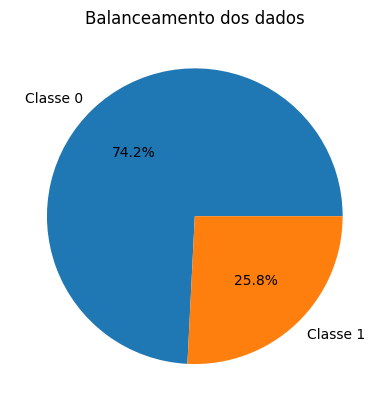

In [4]:
# Contagem dos valores únicos na lista 'classe'
valores, contagem = np.unique(df['label'], return_counts=True)

# Criação do gráfico
labels = ['Classe 0', 'Classe 1']
plt.pie(contagem, labels=labels, autopct='%1.1f%%')
plt.title('Balanceamento dos dados')
plt.show()



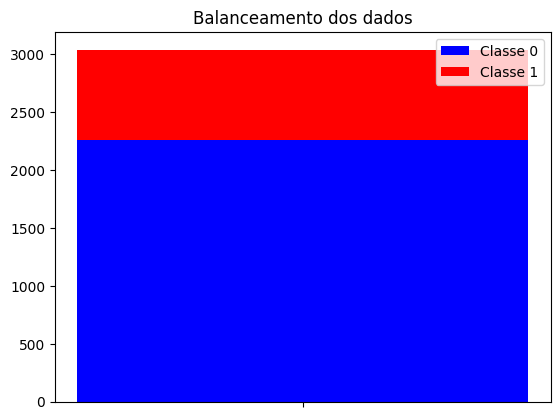

In [5]:
# Contagem dos valores únicos na lista 'classe'
valores, contagem = np.unique(df['label'], return_counts=True)

# Criação do gráfico
barlist = plt.bar([''], contagem[0], color='b')
plt.bar([''], contagem[1], color='r', bottom=contagem[0])
plt.legend(barlist, labels)
plt.legend(('Classe 0', 'Classe 1'))
plt.title('Balanceamento dos dados')
plt.show()



## 12


Transforme os atributos categóricos em numéricos.

Já estava numérico.

- 0 --> sem preconceito
- 1 --> com preconceito

## 13

Faça dois modelos de split da base de dados, ou seja, dois experimentos:
- a. Split 1: Utilizando divisão de 70% para treinamento e 30% para teste
- b. Split 2: Utilizando validação cruzada com k igual a 10.

A divisão da base e a definição do k = 10 para a validação cruzada são feitas no próprio algoritmo de classificação (SVM).

In [6]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
kf = KFold(n_splits=10)

## 14

Defina dois algoritmos de aprendizagem de máquina. Realize o treinamento e teste
para cada split definido na questão 13. Para tanto:
- a. Para cada algoritmo, apresente pelo menos 2 modificações nos parâmetros.
Exemplo, se escolher o KNN, use diferentes valores de K. Se escolher Random
Forest, use diferentes valores para o parâmetro de profundidade. etc.
Ou seja, você deverá realizar 4 experimentos diferentes para cada split da base.
- Split 1:
  - algoritmo 1, parâmetro 1
  - algoritmo 1, parâmetro 2
  - algoritmo 2, parâmetro 1
  - algoritmo 2, parâmetro 2


- Split 2:
  - algoritmo 1, parâmetro 1
  - algoritmo 1, parâmetro 2
  - algoritmo 2, parâmetro 1
  - algoritmo 2, parâmetro 2


------------

# Split 1

### Algoritmo 1
- Classificação Binária
    - 0 - Sem preconceito
    - 1 - Com precoceito
- 60% para treino
- 40% para testes

In [38]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
    # Dividir os dados em recursos (X) e rótulos (y)
    X = df['text']
    y = df['label']
    
    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    
    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.4)
    
    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Classificação dos textos de teste
    y_pred = svm.predict(X_test)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))



Classe 0:
Precision - Min: 0.7832, Max: 0.8419, Mean: 0.8148
Recall - Min: 0.9789, Max: 0.9943, Mean: 0.9877
F1-Score - Min: 0.8740, Max: 0.9095, Mean: 0.8929
Support - Min: 877, Max: 933, Mean: 906.09

Classe 1:
Precision - Min: 0.8475, Max: 0.9545, Mean: 0.9075
Recall - Min: 0.2874, Max: 0.4089, Mean: 0.3481
F1-Score - Min: 0.4374, Max: 0.5653, Mean: 0.5026
Support - Min: 285, Max: 341, Mean: 311.91

Accuracy - Min: 0.7947, Max: 0.8498, Mean: 0.8238


Matriz de Confusão:
[[882  13]
 [213 110]]


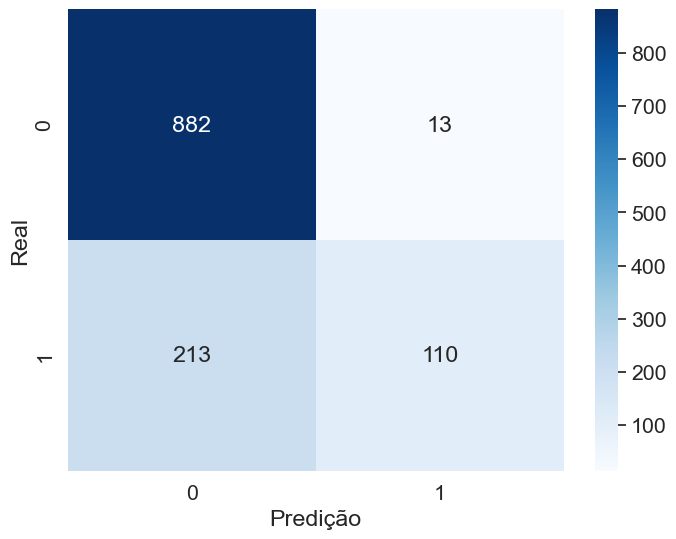

In [39]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

------------

### Algoritmo 1
- Classificação Multiclasse
    - 0 - Neutro
    - 1 - Com precoceito
    - 2 - Ofensivo
- 60% para treino
- 40% para testes

In [40]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

precision_2_list = []
recall_2_list = []
f1_2_list = []
support_2_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
    # Dividir os dados em recursos (X) e rótulos (y)
    X = df['text']
    y = df['label2']
    
    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    
    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.4)
    
    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Classificação dos textos de teste
    y_pred = svm.predict(X_test)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    precision_2_list.append(report['2']['precision'])
    recall_2_list.append(report['2']['recall'])
    f1_2_list.append(report['2']['f1-score'])
    support_2_list.append(report['2']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

precision_2_array = np.array(precision_2_list)
recall_2_array = np.array(recall_2_list)
f1_2_array = np.array(f1_2_list)
support_2_array = np.array(support_2_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

precision_2_min = precision_2_array.min()
precision_2_max = precision_2_array.max()
precision_2_mean = precision_2_array.mean()

recall_2_min = recall_2_array.min()
recall_2_max = recall_2_array.max()
recall_2_mean = recall_2_array.mean()

f1_2_min = f1_2_array.min()
f1_2_max = f1_2_array.max()
f1_2_mean = f1_2_array.mean()

support_2_min = support_2_array.min()
support_2_max = support_2_array.max()
support_2_mean = support_2_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nClasse 2:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_2_min, precision_2_max, precision_2_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_2_min, recall_2_max, recall_2_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_2_min, f1_2_max, f1_2_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_2_min, support_2_max, support_2_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))


Classe 0:
Precision - Min: 0.5964, Max: 0.6884, Mean: 0.6397
Recall - Min: 0.8857, Max: 0.9642, Mean: 0.9254
F1-Score - Min: 0.7267, Max: 0.7876, Mean: 0.7562
Support - Min: 522, Max: 579, Mean: 550.67

Classe 1:
Precision - Min: 0.7919, Max: 0.9384, Mean: 0.8665
Recall - Min: 0.3846, Max: 0.5515, Mean: 0.4588
F1-Score - Min: 0.5381, Max: 0.6734, Mean: 0.5989
Support - Min: 291, Max: 345, Mean: 315.41

Classe 2:
Precision - Min: 0.7701, Max: 0.8954, Mean: 0.8253
Recall - Min: 0.5316, Max: 0.6850, Mean: 0.5959
F1-Score - Min: 0.6446, Max: 0.7418, Mean: 0.6914
Support - Min: 323, Max: 377, Mean: 351.92

Accuracy - Min: 0.6757, Max: 0.7471, Mean: 0.7090


Matriz de Confusão:
[[513  18  26]
 [145 158  27]
 [119   2 210]]


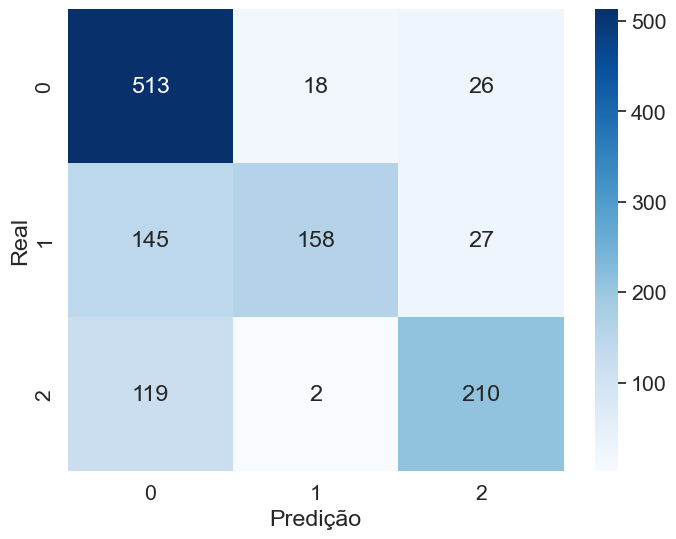

In [41]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

------------

### Algoritmo 2 
- Classificação Binária
    - 0 - Sem preconceito
    - 1 - Com precoceito
- 60% para treino
- 40% para testes

In [42]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
    # Dividir os dados em recursos (X) e rótulos (y)
    x = df['text']
    y = df['label']

    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train_tfidf, y_train)

    # Classificação dos textos de teste
    y_pred = svm.predict(X_test_tfidf)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))



Classe 0:
Precision - Min: 0.7985, Max: 0.8557, Mean: 0.8279
Recall - Min: 0.9640, Max: 0.9911, Mean: 0.9811
F1-Score - Min: 0.8803, Max: 0.9148, Mean: 0.8979
Support - Min: 870, Max: 931, Mean: 903.20

Classe 1:
Precision - Min: 0.8047, Max: 0.9452, Mean: 0.8846
Recall - Min: 0.3423, Max: 0.4814, Mean: 0.4150
F1-Score - Min: 0.4914, Max: 0.6269, Mean: 0.5644
Support - Min: 287, Max: 348, Mean: 314.80

Accuracy - Min: 0.8062, Max: 0.8612, Mean: 0.8346


Matriz de Confusão:
[[894  13]
 [188 123]]


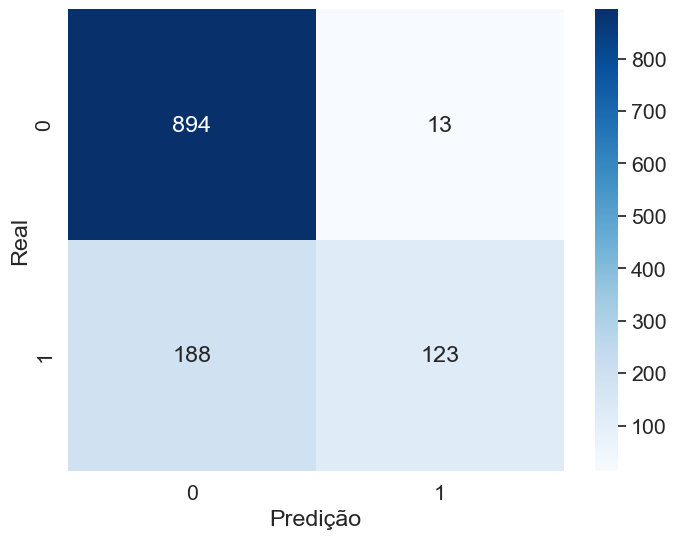

In [43]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

### Algoritmo 2 
- Classificação Multiclasse
    - 0 - Neutro
    - 1 - Com precoceito
    - 2 - Ofensivo
- 60% para treino
- 40% para testes

In [44]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

precision_2_list = []
recall_2_list = []
f1_2_list = []
support_2_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
   # Dividir os dados em recursos (X) e rótulos (y)
    x = df['text']
    y = df['label2']

    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train_tfidf, y_train)

    # Classificação dos textos de teste
    y_pred = svm.predict(X_test_tfidf)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    precision_2_list.append(report['2']['precision'])
    recall_2_list.append(report['2']['recall'])
    f1_2_list.append(report['2']['f1-score'])
    support_2_list.append(report['2']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

precision_2_array = np.array(precision_2_list)
recall_2_array = np.array(recall_2_list)
f1_2_array = np.array(f1_2_list)
support_2_array = np.array(support_2_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

precision_2_min = precision_2_array.min()
precision_2_max = precision_2_array.max()
precision_2_mean = precision_2_array.mean()

recall_2_min = recall_2_array.min()
recall_2_max = recall_2_array.max()
recall_2_mean = recall_2_array.mean()

f1_2_min = f1_2_array.min()
f1_2_max = f1_2_array.max()
f1_2_mean = f1_2_array.mean()

support_2_min = support_2_array.min()
support_2_max = support_2_array.max()
support_2_mean = support_2_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nClasse 2:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_2_min, precision_2_max, precision_2_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_2_min, recall_2_max, recall_2_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_2_min, f1_2_max, f1_2_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_2_min, support_2_max, support_2_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))


Classe 0:
Precision - Min: 0.6263, Max: 0.7117, Mean: 0.6628
Recall - Min: 0.8684, Max: 0.9317, Mean: 0.9001
F1-Score - Min: 0.7380, Max: 0.7925, Mean: 0.7632
Support - Min: 515, Max: 573, Mean: 546.61

Classe 1:
Precision - Min: 0.7697, Max: 0.8966, Mean: 0.8356
Recall - Min: 0.4457, Max: 0.5932, Mean: 0.5109
F1-Score - Min: 0.5781, Max: 0.6931, Mean: 0.6336
Support - Min: 289, Max: 341, Mean: 316.96

Classe 2:
Precision - Min: 0.7483, Max: 0.8717, Mean: 0.8077
Recall - Min: 0.5827, Max: 0.7045, Mean: 0.6420
F1-Score - Min: 0.6748, Max: 0.7532, Mean: 0.7148
Support - Min: 322, Max: 382, Mean: 354.43

Accuracy - Min: 0.6987, Max: 0.7578, Mean: 0.7235


Matriz de Confusão:
[[491  23  33]
 [126 175  23]
 [134   6 207]]


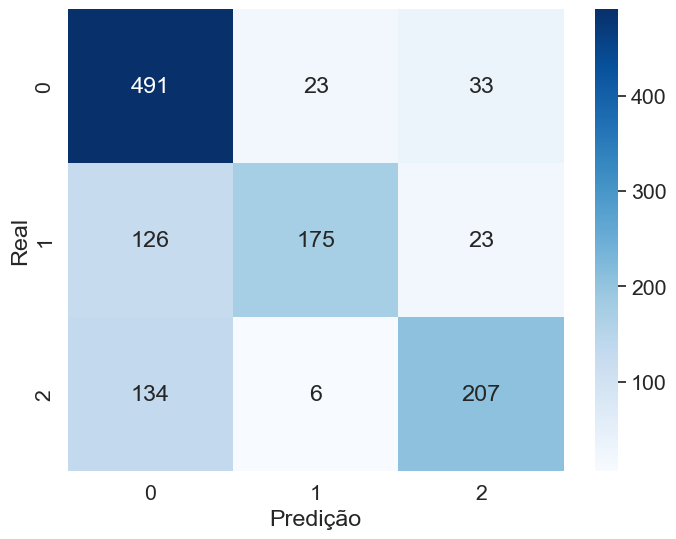

In [45]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

----------------

# Split 2

### Algoritmo 1
- Classificação Binária
    - 0 - Sem preconceito
    - 1 - Com precoceito
- 80% para treino
- 20% para testes

In [46]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
    # Dividir os dados em recursos (X) e rótulos (y)
    X = df['text']
    y = df['label']
    
    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    
    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)
    
    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Classificação dos textos de teste
    y_pred = svm.predict(X_test)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))



Classe 0:
Precision - Min: 0.7674, Max: 0.8745, Mean: 0.8263
Recall - Min: 0.9679, Max: 0.9978, Mean: 0.9842
F1-Score - Min: 0.8639, Max: 0.9249, Mean: 0.8982
Support - Min: 424, Max: 486, Mean: 452.66

Classe 1:
Precision - Min: 0.8286, Max: 0.9857, Mean: 0.8977
Recall - Min: 0.2930, Max: 0.5000, Mean: 0.4018
F1-Score - Min: 0.4402, Max: 0.6475, Mean: 0.5539
Support - Min: 123, Max: 185, Mean: 156.34

Accuracy - Min: 0.7833, Max: 0.8719, Mean: 0.8344


Matriz de Confusão:
[[467  11]
 [ 67  64]]


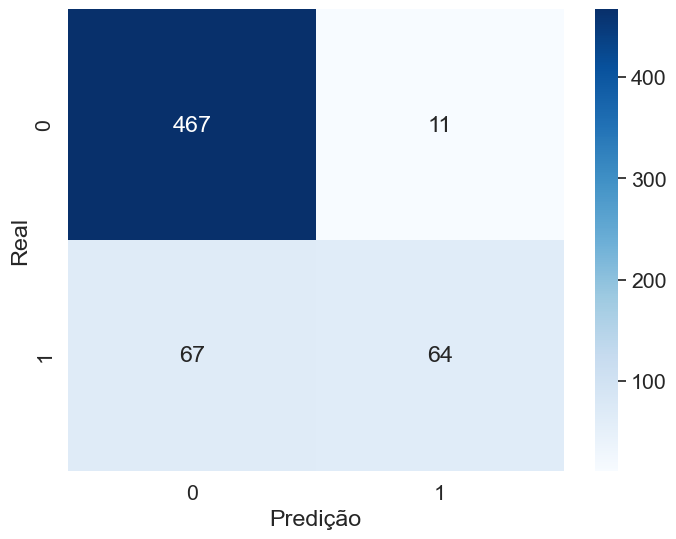

In [47]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

### Algoritmo 1
- Classificação Multiclasse
    - 0 - Neutro
    - 1 - Com precoceito
    - 2 - Ofensivo
- 80% para treino
- 20% para testes

In [48]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

precision_2_list = []
recall_2_list = []
f1_2_list = []
support_2_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
    # Dividir os dados em recursos (X) e rótulos (y)
    X = df['text']
    y = df['label2']
    
    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    
    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)
    
    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Classificação dos textos de teste
    y_pred = svm.predict(X_test)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    precision_2_list.append(report['2']['precision'])
    recall_2_list.append(report['2']['recall'])
    f1_2_list.append(report['2']['f1-score'])
    support_2_list.append(report['2']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

precision_2_array = np.array(precision_2_list)
recall_2_array = np.array(recall_2_list)
f1_2_array = np.array(f1_2_list)
support_2_array = np.array(support_2_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

precision_2_min = precision_2_array.min()
precision_2_max = precision_2_array.max()
precision_2_mean = precision_2_array.mean()

recall_2_min = recall_2_array.min()
recall_2_max = recall_2_array.max()
recall_2_mean = recall_2_array.mean()

f1_2_min = f1_2_array.min()
f1_2_max = f1_2_array.max()
f1_2_mean = f1_2_array.mean()

support_2_min = support_2_array.min()
support_2_max = support_2_array.max()
support_2_mean = support_2_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nClasse 2:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_2_min, precision_2_max, precision_2_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_2_min, recall_2_max, recall_2_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_2_min, f1_2_max, f1_2_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_2_min, support_2_max, support_2_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))


Classe 0:
Precision - Min: 0.5995, Max: 0.7249, Mean: 0.6584
Recall - Min: 0.8832, Max: 0.9579, Mean: 0.9189
F1-Score - Min: 0.7305, Max: 0.8191, Mean: 0.7669
Support - Min: 249, Max: 301, Mean: 274.98

Classe 1:
Precision - Min: 0.7500, Max: 0.9659, Mean: 0.8639
Recall - Min: 0.3750, Max: 0.5944, Mean: 0.4946
F1-Score - Min: 0.5207, Max: 0.7113, Mean: 0.6280
Support - Min: 133, Max: 179, Mean: 158.16

Classe 2:
Precision - Min: 0.7651, Max: 0.9134, Mean: 0.8295
Recall - Min: 0.5455, Max: 0.7101, Mean: 0.6350
F1-Score - Min: 0.6415, Max: 0.7811, Mean: 0.7186
Support - Min: 154, Max: 196, Mean: 175.86

Accuracy - Min: 0.6798, Max: 0.7865, Mean: 0.7265


Matriz de Confusão:
[[251  12  11]
 [ 69  86  14]
 [ 57   4 105]]


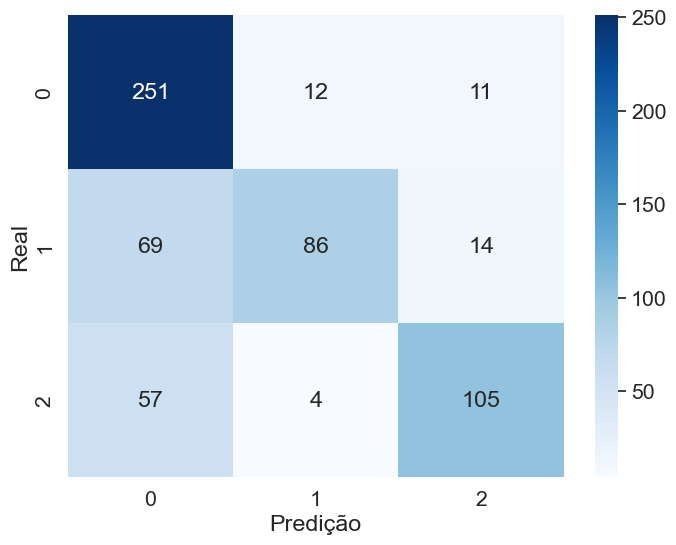

In [49]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

### Algoritmo 2 
- Classificação Binária
    - 0 - Sem preconceito
    - 1 - Com precoceito
- 80% para treino
- 20% para testes

In [50]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
    # Dividir os dados em recursos (X) e rótulos (y)
    x = df['text']
    y = df['label']

    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train_tfidf, y_train)

    # Classificação dos textos de teste
    y_pred = svm.predict(X_test_tfidf)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))



Classe 0:
Precision - Min: 0.8016, Max: 0.8831, Mean: 0.8377
Recall - Min: 0.9611, Max: 0.9891, Mean: 0.9771
F1-Score - Min: 0.8803, Max: 0.9266, Mean: 0.9020
Support - Min: 422, Max: 478, Mean: 453.00

Classe 1:
Precision - Min: 0.7750, Max: 0.9351, Mean: 0.8715
Recall - Min: 0.3267, Max: 0.5515, Mean: 0.4507
F1-Score - Min: 0.4689, Max: 0.6780, Mean: 0.5930
Support - Min: 131, Max: 187, Mean: 156.00

Accuracy - Min: 0.8128, Max: 0.8801, Mean: 0.8422


Matriz de Confusão:
[[461  12]
 [ 61  75]]


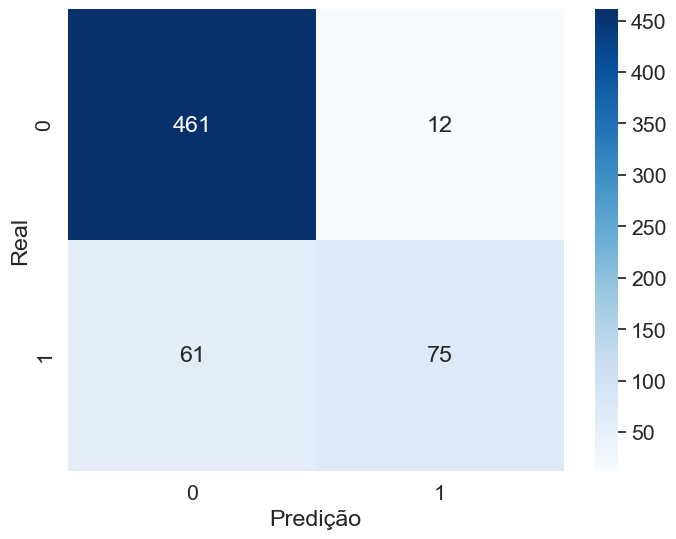

In [51]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

### Algoritmo 2 
- Classificação Multiclasse
    - 0 - Neutro
    - 1 - Com precoceito
    - 2 - Ofensivo
- 80% para treino
- 20% para testes

In [52]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

precision_2_list = []
recall_2_list = []
f1_2_list = []
support_2_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
   # Dividir os dados em recursos (X) e rótulos (y)
    x = df['text']
    y = df['label2']

    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train_tfidf, y_train)

    # Classificação dos textos de teste
    y_pred = svm.predict(X_test_tfidf)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0']['precision'])
    recall_0_list.append(report['0']['recall'])
    f1_0_list.append(report['0']['f1-score'])
    support_0_list.append(report['0']['support'])
    
    precision_1_list.append(report['1']['precision'])
    recall_1_list.append(report['1']['recall'])
    f1_1_list.append(report['1']['f1-score'])
    support_1_list.append(report['1']['support'])
    
    precision_2_list.append(report['2']['precision'])
    recall_2_list.append(report['2']['recall'])
    f1_2_list.append(report['2']['f1-score'])
    support_2_list.append(report['2']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

precision_2_array = np.array(precision_2_list)
recall_2_array = np.array(recall_2_list)
f1_2_array = np.array(f1_2_list)
support_2_array = np.array(support_2_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

precision_2_min = precision_2_array.min()
precision_2_max = precision_2_array.max()
precision_2_mean = precision_2_array.mean()

recall_2_min = recall_2_array.min()
recall_2_max = recall_2_array.max()
recall_2_mean = recall_2_array.mean()

f1_2_min = f1_2_array.min()
f1_2_max = f1_2_array.max()
f1_2_mean = f1_2_array.mean()

support_2_min = support_2_array.min()
support_2_max = support_2_array.max()
support_2_mean = support_2_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nClasse 2:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_2_min, precision_2_max, precision_2_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_2_min, recall_2_max, recall_2_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_2_min, f1_2_max, f1_2_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_2_min, support_2_max, support_2_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))


Classe 0:
Precision - Min: 0.6160, Max: 0.7326, Mean: 0.6796
Recall - Min: 0.8379, Max: 0.9380, Mean: 0.8982
F1-Score - Min: 0.7334, Max: 0.8142, Mean: 0.7734
Support - Min: 250, Max: 304, Mean: 273.99

Classe 1:
Precision - Min: 0.7473, Max: 0.9419, Mean: 0.8379
Recall - Min: 0.4277, Max: 0.6294, Mean: 0.5386
F1-Score - Min: 0.5643, Max: 0.7328, Mean: 0.6546
Support - Min: 136, Max: 185, Mean: 158.35

Classe 2:
Precision - Min: 0.7273, Max: 0.9034, Mean: 0.8148
Recall - Min: 0.5876, Max: 0.7861, Mean: 0.6690
F1-Score - Min: 0.6731, Max: 0.8024, Mean: 0.7340
Support - Min: 153, Max: 200, Mean: 176.66

Accuracy - Min: 0.6929, Max: 0.7898, Mean: 0.7379


Matriz de Confusão:
[[248  14  12]
 [ 66  85  18]
 [ 53   3 110]]


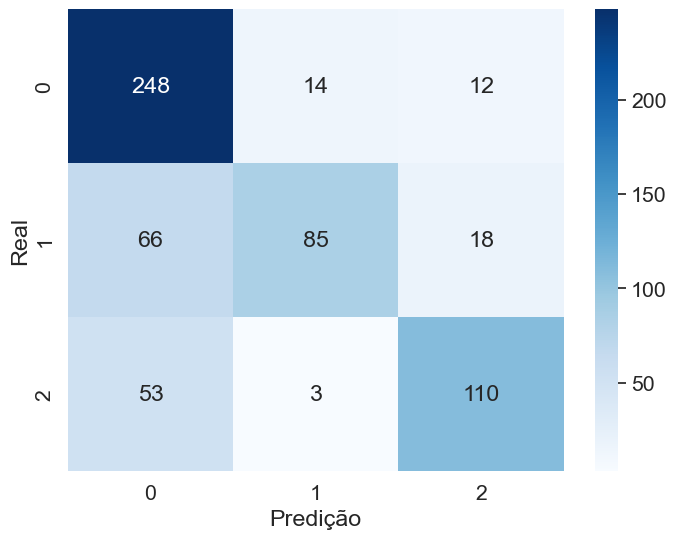

In [53]:
# Geração da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Impressão da matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotagem da matriz de confusão em um heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()